### Project 5 - Tree Classifiers (Decision Tree, Random Forest, HistGradient Boosting, XGBoosting)
#### Rishav Agarwal (ra3141)

<b>Dataset: </b> https://www.kaggle.com/datasets/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv

<b>Goal:</b> The goal is to predict wins based on in-match performace of multiple players and to understand which features may act as the deciding factors in determining the wins.  

### Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("data/tb_lobby_stats_player.csv")
df

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184147,172907,2716,178496,21,3,13,5,1,1,0.0,...,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0,1,2021-11-27 16:47:57
184148,172908,2716,178497,15,1,22,5,0,1,0.0,...,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0,1,2021-12-10 01:08:48
184149,172909,2716,178498,9,6,23,2,0,3,0.0,...,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0,0,2022-01-09 21:01:10
184150,172910,2716,178499,15,5,20,6,0,2,0.0,...,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0,0,2022-01-14 17:42:37


In [3]:
dict2={}
for col in df:
    c=0
    for val in df[col].isna():
        if(val == True):
            c=c+1
    dict2[col]=round((c/len(df[col]))*100,2)

In [4]:
dict2 #keys= column names; values = missing percentage

{'idLobbyGame': 0.0,
 'idPlayer': 0.0,
 'idRoom': 0.0,
 'qtKill': 0.0,
 'qtAssist': 0.0,
 'qtDeath': 0.0,
 'qtHs': 0.0,
 'qtBombeDefuse': 0.0,
 'qtBombePlant': 0.0,
 'qtTk': 0.07,
 'qtTkAssist': 0.07,
 'qt1Kill': 0.0,
 'qt2Kill': 0.0,
 'qt3Kill': 0.0,
 'qt4Kill': 0.0,
 'qt5Kill': 0.0,
 'qtPlusKill': 0.0,
 'qtFirstKill': 0.0,
 'vlDamage': 0.0,
 'qtHits': 0.07,
 'qtShots': 0.0,
 'qtLastAlive': 0.07,
 'qtClutchWon': 0.0,
 'qtRoundsPlayed': 0.0,
 'descMapName': 0.0,
 'vlLevel': 0.0,
 'qtSurvived': 0.38,
 'qtTrade': 0.38,
 'qtFlashAssist': 0.38,
 'qtHitHeadshot': 0.38,
 'qtHitChest': 0.38,
 'qtHitStomach': 0.38,
 'qtHitLeftAtm': 0.38,
 'qtHitRightArm': 0.38,
 'qtHitLeftLeg': 0.38,
 'qtHitRightLeg': 0.38,
 'flWinner': 0.0,
 'dtCreatedAt': 0.0}

Text(0, 0.5, 'Missing Value %age')

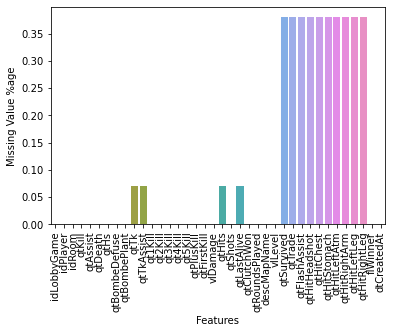

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.barplot(list(dict2.keys()),list(dict2.values()))
ax.tick_params(axis='x', rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Value %age")

In [6]:
df1 = df.dropna()
df1.reset_index(drop=True, inplace=True)
df1=df1.drop(columns=['idLobbyGame','idPlayer','idRoom','dtCreatedAt'])

The percentage of missing values is less than 0.4% for few of the columns. In this scenario, it does not make good practice to drop all those columns completely as that would greatly affect the dataset. On top of that, adding values to it will cause problems in the dataset as a whole as it will not give us valid answers because the data would be impure.

In [7]:
target = df1['flWinner']
data =  df1.drop(columns=['flWinner'])

In [8]:
data

,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,qtTkAssist,qt1Kill,qt2Kill,...,qtSurvived,qtTrade,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg
0,5,1,16,2,0,0,0.0,0.0,3,1,...,1.0,2.0,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0
1,24,3,18,6,0,4,0.0,1.0,9,4,...,8.0,1.0,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0
2,6,4,23,2,0,1,0.0,1.0,4,1,...,2.0,3.0,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0
3,10,5,20,4,1,0,0.0,0.0,6,2,...,3.0,4.0,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0
4,8,4,26,6,0,2,0.0,0.0,4,2,...,4.0,4.0,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183442,21,3,13,5,1,1,0.0,0.0,8,5,...,11.0,0.0,0.0,7.0,42.0,26.0,1.0,4.0,6.0,2.0
183443,15,1,22,5,0,1,0.0,0.0,11,2,...,7.0,5.0,0.0,5.0,21.0,21.0,3.0,7.0,2.0,4.0
183444,9,6,23,2,0,3,0.0,0.0,9,0,...,4.0,2.0,0.0,3.0,25.0,12.0,1.0,5.0,6.0,7.0
183445,15,5,20,6,0,2,0.0,0.0,13,1,...,5.0,3.0,1.0,8.0,22.0,16.0,2.0,8.0,3.0,6.0


### Pre-Processing 

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from IPython.display import Image 
import pandas as pd
import numpy as np
import time

In [10]:
from sklearn.model_selection import train_test_split
dev_x, test_x, dev_y, test_y = train_test_split(data, target, test_size=0.2, random_state=42)

In [11]:
dev_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)
dev_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [12]:
from numpy import asarray
from sklearn.preprocessing import OneHotEncoder

# define data
data_dev = dev_x['descMapName'].to_numpy()
data_dev=data_dev.reshape(-1,1)

# define one hot encoding
encoder = OneHotEncoder(sparse=False)
# transform data
onehot = encoder.fit_transform(data_dev)


data_test = test_x['descMapName'].to_numpy()
data_test=data_test.reshape(-1,1)
onehot_test = encoder.transform(data_test)

In [13]:
col= dev_x['descMapName'].unique()
col1 = test_x['descMapName'].unique()

In [14]:
dev_cat = pd.DataFrame(onehot, columns=col)
test_cat = pd.DataFrame(onehot_test, columns = col1)

In [15]:
dev_X = pd.concat([dev_x,dev_cat], axis=1)
test_X = pd.concat([test_x, test_cat], axis=1)

In [16]:
dev_X= dev_X.drop(columns=['descMapName'])
test_X=test_X.drop(columns=['descMapName'])

### Decision Tree

They are Supervised Machine Learning algorithms which can be used for classifications and Regression Problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves. It is basically a set of if-else statement created on the basis of the training data. When a new data points enters the tree, the tree checks and then parses it through either the left subtree or the right subtree.

Example Image!


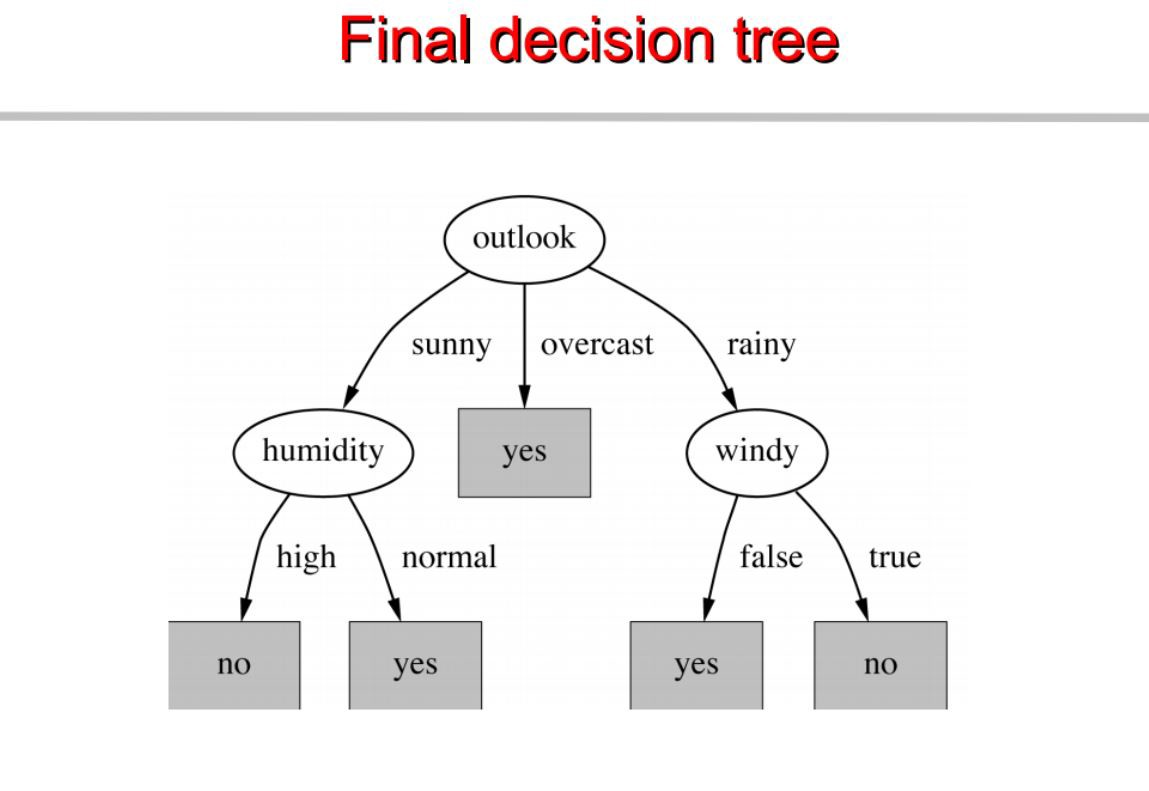

In [61]:
from IPython.display import Image
print("Example Image!")
Image(filename='doc/example_figures/Decision_Tree.jpeg', width = 400, height = 400) 

In [17]:
dt = DecisionTreeClassifier()
dt.fit(dev_X, dev_y)

DecisionTreeClassifier()

In [18]:
accuracy_dt = dt.score(test_X,test_y)
accuracy = dt.score(dev_X,dev_y)
print("Accuracy on Development Set: ", accuracy)
print("Accuracy on Test Set: ", accuracy_dt)

Accuracy on Development Set:  1.0
Accuracy on Test Set:  0.7264377214499864


The data seems to be a balanced data, providing a baseline accuracy of 50%, as the development test shows an accuracy of 100%. Thus, for such a balanced data it makes sense to go with accuracy as the scoring metric.

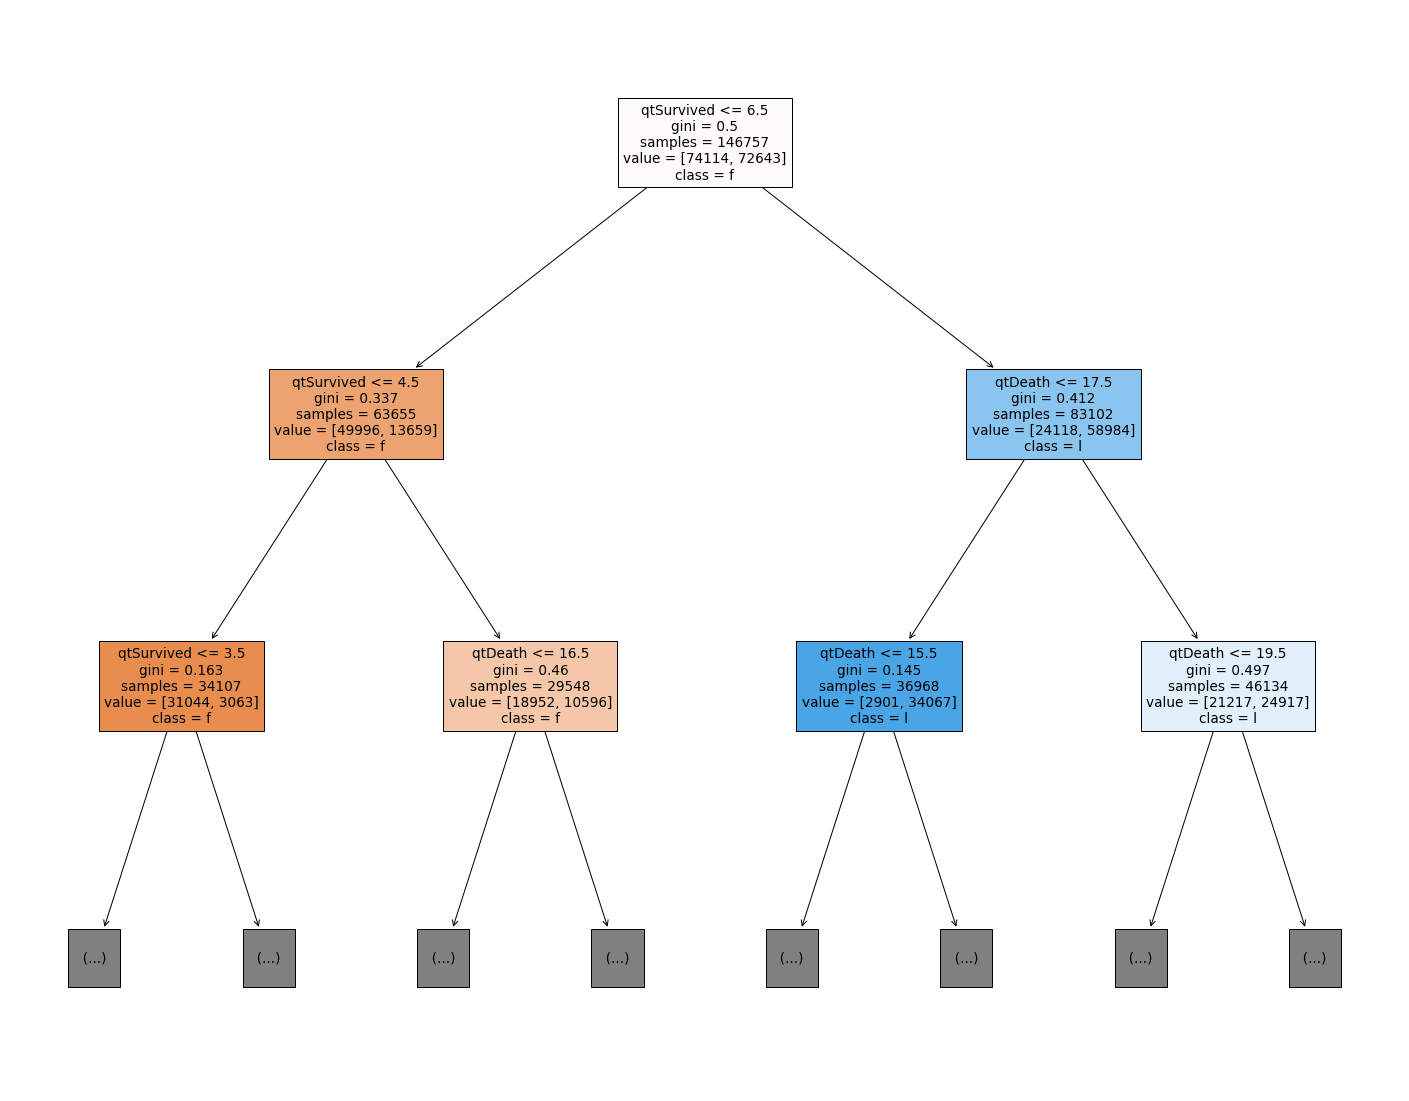

In [19]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=dev_X.columns,  
                   class_names='flWinner',
                   filled=True,
                  max_depth=2)

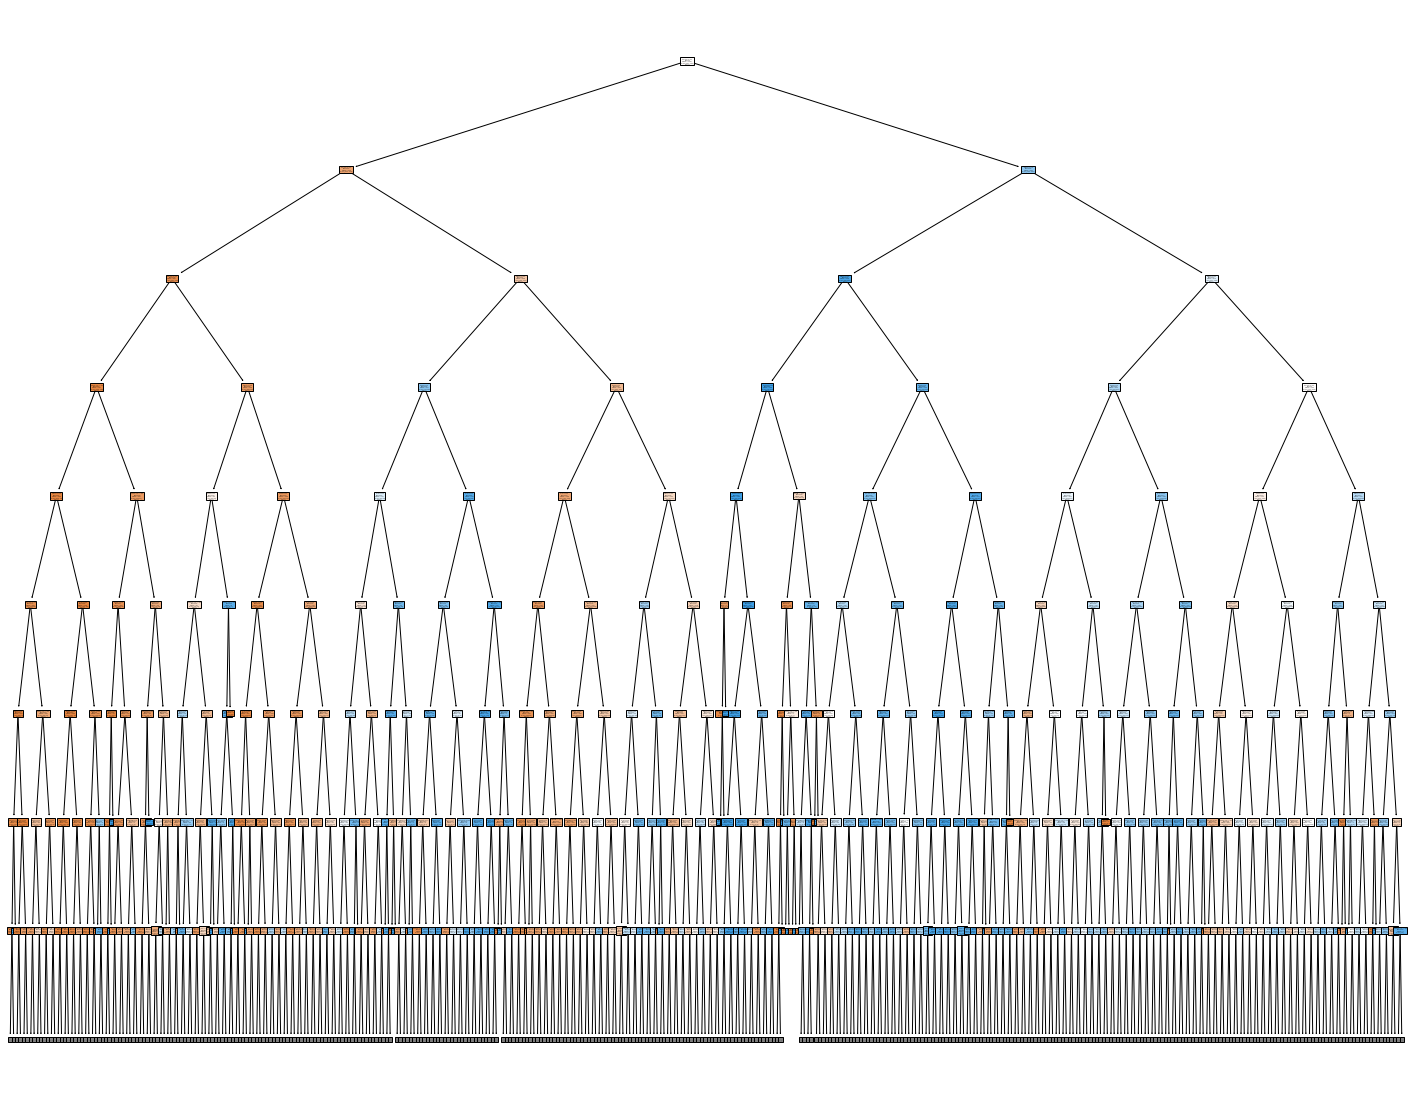

In [20]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=dev_X.columns,  
                   class_names='flWinner',
                   filled=True,
                  max_depth=8)

### Preventing Overfitting in Decision Tree

Decision Tree is prone to Overfitting and one of the techniques to reduce that is the Minimal Cost-Complexity Pruning. 

This algorithm is parameterized by α(≥0) known as the complexity parameter.

The complexity parameter is used to define the cost-complexity measure, Rα(T) of a given tree T: 
Rα(T)=R(T)+α|T|

Basically, we get the alpha values for each subtree and then pass those as a hyper-parameter when initalizing a Decision Tree object. Based on this, we can calaculate the accuracy for each pruning and then decided on the one which acts as the best. 

In [21]:
path = dt.cost_complexity_pruning_path(dev_X, dev_y)

In [22]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [23]:
ccp_alphas

array([0.00000000e+00, 3.36955303e-06, 3.39650946e-06, ...,
       1.55890694e-02, 4.06899998e-02, 1.20458427e-01])

In [24]:
ccp = ccp_alphas[-11:-1]

In [25]:
accuracy=[]
for c in ccp:
    dt1 = DecisionTreeClassifier(ccp_alpha=c)
    dt1.fit(dev_X, dev_y)
    accuracy.append(dt1.score(test_X,test_y))

In [26]:
m = max(accuracy)
for a in range(len(accuracy)):
    if(accuracy[a]==m):
        valid_ccp_alpha = ccp[a]
        break

In [ ]:
valid_ccp_alpha

In [29]:
start = time.time()
dt2 = DecisionTreeClassifier(ccp_alpha=valid_ccp_alpha)
dt2.fit(dev_X, dev_y)
accuracy_ccp = dt2.score(test_X,test_y)
end = time.time()
total_dt_time = end - start
print("Accuracy after Pruning: ", accuracy_ccp)

Accuracy after Pruning:  0.7620877623330607


The accuracy of the Decision Tree before pruning was 72.64% but now it has improved to 76.21%

### Feature Importance from Decision Tree

In [30]:
col_names=[]
for x in dev_X:
    col_names.append(x)

In [31]:
feat = dt2.feature_importances_

In [32]:
for i in range(0, len(feat)):
    for j in range(0, len(feat)-1):
        if(feat[j]<feat[j+1]):
            t = feat[j]
            feat[j] = feat[j+1]
            feat[j+1]=t
            t1 = col_names[j]
            col_names[j]=col_names[j+1]
            col_names[j+1]=t1

<AxesSubplot:>

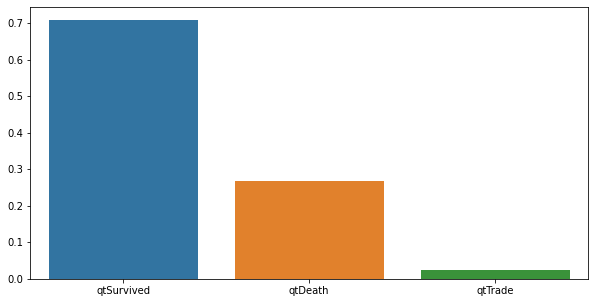

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(col_names[0:3], feat[0:3])

qtSurvived signifies the core of the game, as it determines the number of round survived. This in turn allows to determine if the player tops the game board and in turn wins it. So this feature being the most important makes sense. For qtDeath, we know that it signfies the number of kills made. As it is a multi-player game, looking at the performance of those players, we can inadvertently say that the most kills signifies that the player survived for the longest rounds, again pointing out towards the chances of that player winning the game. Lastly, we have qtTrade. This term signifies an inicident where one player kills another player, and then is killed by teammate of the first killed player. This can also contribute as an important feature because it combines the feature of killing and surviving.

### Random Forest Classifier

Random Forest is an algorithm that acts as an ensemble of Decision Tree (a collection of Decision Trees). Each of the trees in this Random Forest provides a class, then the algorithm predicts the final class based on majority voting (that is the class that is predicted the most number of times).

The best part about this algorithm is that it is protected from a lot of errors as each trees in the algorithm works as its own. The two parameters that is important to this are:
1) n_estimators: This signifies the number of trees that we want to build before we calculate the prediction. Greater the number of trees, better is the performance of the Random Forest.<br>
2) max_depth: This represents the depth of each of the tree in the decision tree. The greater the depth, the greater is the number of split which means the information captured by the tree is more, making the accuracy even better.

Example Image!


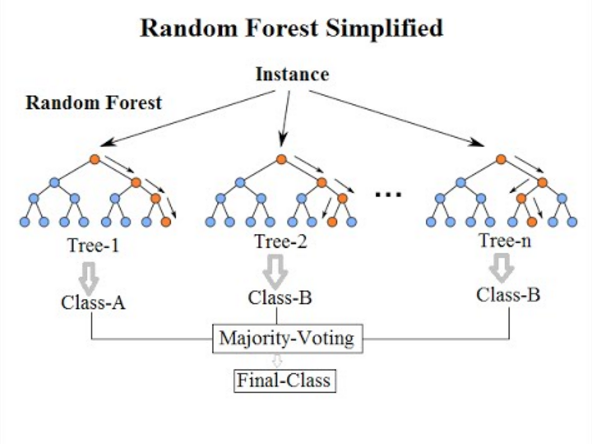

In [63]:
from IPython.display import Image
print("Example Image!")
Image(filename='doc/example_figures/Random_Forest.png', width = 400, height = 400) 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier()
clf.fit(dev_X, dev_y)

RandomForestClassifier()

In [35]:
accuracy_rf = clf.score(test_X, test_y)
print("Accuracy: ",accuracy_rf)

Accuracy:  0.7908149359498501


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
n_estimators= [100, 150, 200, 250, 300]
max_depth = [5, 10, 15, 20, 25]
hyperparam=[]
for est in n_estimators:
    l1=[]
    for depth in max_depth:
        rf = RandomForestClassifier(n_estimators = est, max_depth = depth)
        rf.fit(dev_X, dev_y)
        scores = cross_val_score(rf,test_X, test_y, cv = 5)
        accuracy = np.mean(scores)
        l1.append(accuracy)
        print("n_estimators: ",est,"\tmax_depth: ",depth,"\tAccuracy: ",accuracy)
    hyperparam.append(l1)

n_estimators:  100 	max_depth:  5 	Accuracy:  0.7653856636685745
n_estimators:  100 	max_depth:  10 	Accuracy:  0.7813028073044426
n_estimators:  100 	max_depth:  15 	Accuracy:  0.7852275824475334
n_estimators:  100 	max_depth:  20 	Accuracy:  0.7850367947669665
n_estimators:  100 	max_depth:  25 	Accuracy:  0.7843554101935132
n_estimators:  150 	max_depth:  5 	Accuracy:  0.7664486236031616
n_estimators:  150 	max_depth:  10 	Accuracy:  0.7817116380485145
n_estimators:  150 	max_depth:  15 	Accuracy:  0.785554647042791
n_estimators:  150 	max_depth:  20 	Accuracy:  0.7869991823385118
n_estimators:  150 	max_depth:  25 	Accuracy:  0.7871899700190788
n_estimators:  200 	max_depth:  5 	Accuracy:  0.7654674298173889
n_estimators:  200 	max_depth:  10 	Accuracy:  0.7819841918778959
n_estimators:  200 	max_depth:  15 	Accuracy:  0.7852548378304716
n_estimators:  200 	max_depth:  20 	Accuracy:  0.7877350776778413
n_estimators:  200 	max_depth:  25 	Accuracy:  0.7848732624693378
n_estimators: 

In [37]:
max1=hyperparam[0][0]
for i in range(len(hyperparam)):
    for j in range(len(hyperparam[i])):
        if(hyperparam[i][j] > max1):
            max1= hyperparam[i][j]
            est = i
            depth =j
best_est_rf = n_estimators[est]
best_depth_rf = max_depth[depth]
print("\nBest n_estimator: ", best_est_rf)
print("\nBest max_depth: ", best_depth_rf)


Best n_estimator:  300

Best max_depth:  20


In [38]:
import time
start = time.time()
rf = RandomForestClassifier(n_estimators = best_est_rf, max_depth = best_depth_rf)
rf.fit(dev_X, dev_y)
accuracy_rt = rf.score(test_X, test_y)
end = time.time()
total_rf_time = end - start
print("Accuracy: ",accuracy_rt)

Accuracy:  0.7922867266285092


### Feature Importance from Random Forest

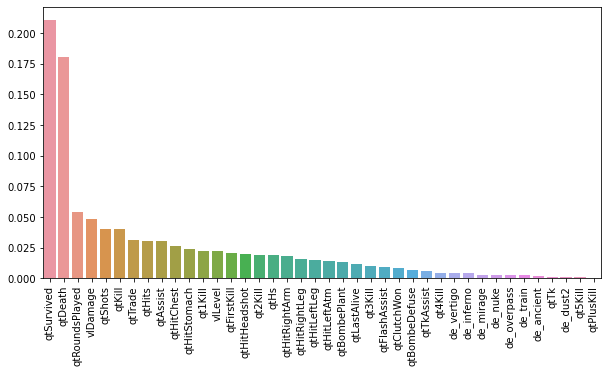

In [39]:
col_names=[]
for x in dev_X:
    col_names.append(x)

feat = rf.feature_importances_

for i in range(0, len(feat)):
    for j in range(0, len(feat)-1):
        if(feat[j]<feat[j+1]):
            t = feat[j]
            feat[j] = feat[j+1]
            feat[j+1]=t
            t1 = col_names[j]
            col_names[j]=col_names[j+1]
            col_names[j+1]=t1
plt.figure(figsize=(10,5))
ax = sns.barplot(col_names, feat)
ax.tick_params(axis='x', rotation=90)

There is one difference in the top 3 feature set produced by Random Forest as compared to Decision Tree. qtSurvived and qtDeath have the same reasoning as the one in Decision Tree. qtRoundsPlayed was added instead of qtTrade. This set makes more sense because more the number of rounds played, more the chances of a player winning the game. This seems more relevant than taking into account the Trade Kill, and as Random Forest has greater accuracy, it has more credibility.

### Boosting

Boosting is part of ensemble technique that uses the tree models to perform classifications and regressions. Unlike Random Forest, here the output of one tree feeds into another tree. If a sample is misclassified by one of the trees then the next tree focuses on that, that is, it tries to minimize the loss function at every instance. 
Gradient Boosting is one of the most common and famous algorithm for this type of computation, and it is the generalization of the AdaBoost Technique. But in practice, it is a very slow model, as trees are created and then added sequentially. 

Example Image!


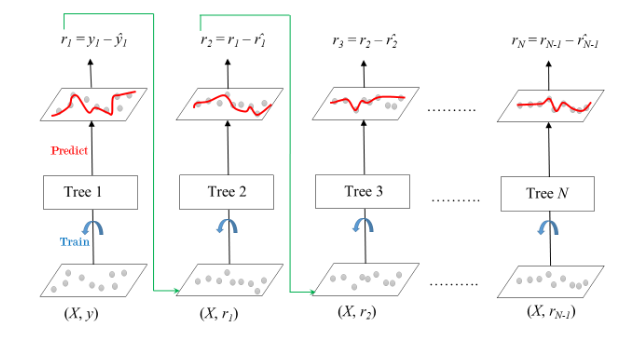

In [64]:
from IPython.display import Image
print("Example Image!")
Image(filename='doc/example_figures/GB.png', width = 400, height = 400) 



So, we bring about two techniques stemming from Gradient Boosting.

1) Histogram Gradient Boosting (HistGradient Boosting): 
As Boosting is highly dependant on the construction of the Decision Trees and those taking time, this method aims to make that process faster. It creates binning of values into fixed number of buckets (Histogram), thus, reducing the number of unique values significantly. 

2) eXtreme Gradient Boosting (XGBoosting): Another implementation of the Gradient Boosting which aims to speed up the entire process. It is just a more optimized version of HistGradient Boosting and thus is an industry-favourite. 

### HistGradient Boosting Classifier

In [51]:
#Hist
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import time
max_iter_hgb= [100, 200]
max_depth_hgb = [5, 7]
learning_rate_hgb=[0.1,1.0]
hyperparam_hgb=[]
start = time.time()
for ite in max_iter_hgb:
    l1=[]
    for depth in max_depth_hgb:
        l2=[]
        for lr in learning_rate_hgb:
            hgb = HistGradientBoostingClassifier(max_iter=ite, learning_rate=lr, max_depth=depth)
            hgb.fit(dev_X, dev_y)
            scores = cross_val_score(hgb,test_X, test_y, cv = 5)
            accuracy = np.mean(scores) 
            l2.append(accuracy)
            print("max_iter: ",ite,"\tmax_depth: ",depth,"\tlearning_rate: ",lr,"\tAccuracy: ",accuracy)
        l1.append(l2)
    hyperparam_hgb.append(l1)
end = time.time()
hgb_time = end - start

max_iter:  100 	max_depth:  5 	learning_rate:  0.1 	Accuracy:  0.7948487326246934
max_iter:  100 	max_depth:  5 	learning_rate:  1.0 	Accuracy:  0.7789315889888252
max_iter:  100 	max_depth:  7 	learning_rate:  0.1 	Accuracy:  0.7952575633687653
max_iter:  100 	max_depth:  7 	learning_rate:  1.0 	Accuracy:  0.7744889615699101
max_iter:  200 	max_depth:  5 	learning_rate:  0.1 	Accuracy:  0.7959662033251567
max_iter:  200 	max_depth:  5 	learning_rate:  1.0 	Accuracy:  0.7801580812210411
max_iter:  200 	max_depth:  7 	learning_rate:  0.1 	Accuracy:  0.7954210956663941
max_iter:  200 	max_depth:  7 	learning_rate:  1.0 	Accuracy:  0.7757154538021259


In [52]:
max1=hyperparam_hgb[0][0][0]
for i in range(len(hyperparam_hgb)):
    for j in range(len(hyperparam_hgb[i])):
        for k in range(len(hyperparam_hgb[i][j])):
            if(hyperparam_hgb[i][j][k] >= max1):
                max1= hyperparam_hgb[i][j][k]
                est = i
                depth =j
                lr = k
best_iter_hgb = max_iter_hgb[est]
best_depth_hgb = max_depth_hgb[depth]
best_lr_hgb = learning_rate_hgb[lr]

print("\nBest max_iter: ", best_iter_hgb)
print("\nBest max_depth: ", best_depth_hgb)
print("\nBest Learning_rate: ", best_lr_hgb)


Best max_iter:  200

Best max_depth:  5

Best Learning_rate:  0.1


In [53]:
start = time.time()
hgb = HistGradientBoostingClassifier(max_iter=best_iter_hgb, learning_rate=best_lr_hgb, max_depth=best_depth_hgb)
hgb.fit(dev_X, dev_y)
accuracy_hgb = hgb.score(test_X, test_y)
end = time.time()
hgb_time = end - start
print("Best Accuracy with the tuned Hyperparameters: ", accuracy_hgb)

Best Accuracy with the tuned Hyperparameters:  0.8003270645952576


### XGBoost Classifier

In [44]:
import xgboost as xgb
import time
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

n_estimators_xgb= [100, 200]
max_depth_xgb = [5, 7]
learning_rate_xgb=[0.1,1.0]
hyperparam_xg=[]
start = time.time()
for est in n_estimators_xgb:
    l1=[]
    for depth in max_depth_xgb:
        l2=[]
        for lr in learning_rate_xgb:
            xgb = XGBClassifier(n_estimators=est, learning_rate=lr, max_depth=depth, eval_metric= 'logloss')
            xgb.fit(dev_X, dev_y)
            scores = cross_val_score(xgb,test_X, test_y, cv = 5)
            accuracy = np.mean(scores) 
            l2.append(accuracy)
            print("n_estimators: ",est,"\tmax_depth: ",depth,"\tlearning_rate: ",lr,"\tAccuracy: ",accuracy)
        l1.append(l2)
    hyperparam_xg.append(l1)
end = time.time()
xg_time = end - start

n_estimators:  100 	max_depth:  5 	learning_rate:  0.1 	Accuracy:  0.7974379940038158
n_estimators:  100 	max_depth:  5 	learning_rate:  1.0 	Accuracy:  0.7642681929681112
n_estimators:  100 	max_depth:  7 	learning_rate:  0.1 	Accuracy:  0.794358135731807
n_estimators:  100 	max_depth:  7 	learning_rate:  1.0 	Accuracy:  0.7627146361406377
n_estimators:  200 	max_depth:  5 	learning_rate:  0.1 	Accuracy:  0.7961842463886617
n_estimators:  200 	max_depth:  5 	learning_rate:  1.0 	Accuracy:  0.7625238484600707
n_estimators:  200 	max_depth:  7 	learning_rate:  0.1 	Accuracy:  0.7926683019896429
n_estimators:  200 	max_depth:  7 	learning_rate:  1.0 	Accuracy:  0.7663123466884709


In [45]:
max1=hyperparam_xg[0][0][0]
for i in range(len(hyperparam_xg)):
    for j in range(len(hyperparam_xg[i])):
        for k in range(len(hyperparam_xg[i][j])):
            if(hyperparam_xg[i][j][k] >= max1):
                max1= hyperparam_xg[i][j][k]
                est = i
                depth =j
                lr = k
best_est_xgb = n_estimators_xgb[est]
best_depth_xgb = max_depth_xgb[depth]
best_lr_xgb = learning_rate_xgb[lr]
print("\nBest n_estimator: ", best_est_xgb)
print("\nBest max_depth: ", best_depth_xgb)
print("\nBest Learning_rate: ", best_lr_xgb)


Best n_estimator:  100

Best max_depth:  5

Best Learning_rate:  0.1


In [46]:
start = time.time()
xgb = XGBClassifier(n_estimators=best_est_xgb, learning_rate=best_lr_xgb, max_depth=best_depth_xgb, eval_metric= 'logloss')
xgb.fit(dev_X, dev_y)
accuracy_xgb = xgb.score(test_X, test_y)
end = time.time()
total_xgb_time = end - start
print("Best Accuracy with the tuned Hyperparameters: ", accuracy_xgb)

Best Accuracy with the tuned Hyperparameters:  0.7994548923412373


### Feature Importance from XGBoosting 

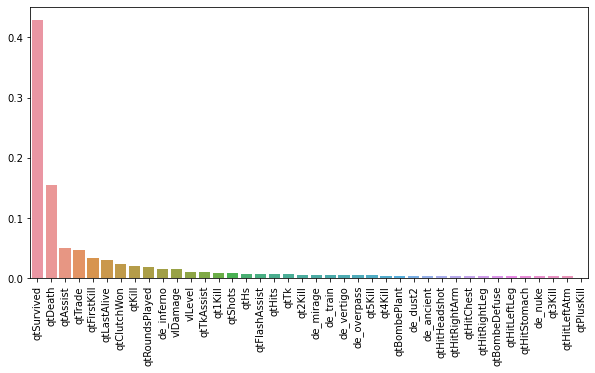

In [47]:
col_names=[]
for x in dev_X:
    col_names.append(x)

feat = xgb.feature_importances_

for i in range(0, len(feat)):
    for j in range(0, len(feat)-1):
        if(feat[j]<feat[j+1]):
            t = feat[j]
            feat[j] = feat[j+1]
            feat[j+1]=t
            t1 = col_names[j]
            col_names[j]=col_names[j+1]
            col_names[j+1]=t1
plt.figure(figsize=(10,5))
ax = sns.barplot(col_names, feat)
ax.tick_params(axis='x', rotation=90)

There is one difference in the top 3 feature set produced by XGBoost as compared to Random Forest and Decision Tree. qtSurvived and qtDeath have the same reasoning as the one in the first two. qtAssist was added instead of qtTrade and qtRoundsPlayed. This set makes more sense because more the number of assist done in the game determines for a more team cenric game and this might signal as one of the criteria to win in the game. And as XGBoost has higher accuracy than the other two, trusting this feature set makes the most sense.

### Conclusion

In [54]:
classifier_accuracies = [accuracy_ccp, accuracy_rt, accuracy_hgb,accuracy_xgb]
total_time = [total_dt_time, total_rf_time, hgb_time, total_xgb_time]
classifiers = ['Decision Tree', 'Random Forest', 'HistGradient Boosting', 'XGBoost']

dict1 = {'Classifiers' : classifiers, 'Accuracies': classifier_accuracies, 'Time Taken': total_time}

In [55]:
df_table = pd.DataFrame(dict1)

In [56]:
df_table

,Classifiers,Accuracies,Time Taken
0,Decision Tree,0.762088,4.201966
1,Random Forest,0.792287,142.459360
2,HistGradient Boosting,0.800327,6.860652
3,XGBoost,0.799455,5.174858


Among the above 4 classifiers, HistGradientBoosting performs the best, while Decision Tree performs the worst. The difference between the two is significantly close to 4%. Thus, it makes sense to choose HistGradientBoosting among the 4 models. On top of that, if we look at that time taken by HistGradient it is very close to the second best accuracy-model (XGBoosting), so we can disregard the time factor here.  

The Features that play the most important roles as given by XGBoosting Classifier are qtSurvived, abdqtAssist was added instead of qtTrade and qtRoundsPlayed. This set makes more sense because more the number of assist done in the game determines for a more team cenric game and this might signal as one of the criteria to win in the game. And as XGBoost has higher accuracy than the other two, trusting this feature set makes the most sense.